In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Own modules
import load_cifar10
import experiments

In [2]:
train_dataset, val_dataset, test_dataset = load_cifar10.load_and_create_loaders('../CIFAR-10', return_ds=True)

Data loaded succesfully! as <class 'torch.Tensor'>
Training data shape: torch.Size([40000, 3, 32, 32])


In [3]:
# Set architecture
input_size = 32 * 32 * 3  # 3072 features per image
hidden_layers = [1000, 1000] 
num_classes = 10  # CIFAR-10 has 10 classes
lr=0.001

# Create dict to pass to experiments
architecture = {
    'input_size': input_size,
    'hlayers_size': hidden_layers,
    'lr': lr,
    'num_classes': num_classes
}

In [4]:
experiment = experiments.Experiment(architecture=architecture, train_strategy='OE')

In [5]:
lc_results = experiment.generate_learning_curve(train_dataset=train_dataset, val_dataset=val_dataset, batch_size=32)



Training with 10 samples...

Training with 1388 samples...

Training with 2767 samples...

Training with 4146 samples...

Training with 5525 samples...

Training with 6904 samples...

Training with 8283 samples...

Training with 9662 samples...

Training with 11041 samples...

Training with 12420 samples...

Training with 13799 samples...

Training with 15178 samples...

Training with 16557 samples...

Training with 17936 samples...

Training with 19315 samples...

Training with 20694 samples...

Training with 22073 samples...

Training with 23452 samples...

Training with 24831 samples...

Training with 26210 samples...

Training with 27589 samples...

Training with 28968 samples...

Training with 30347 samples...

Training with 31726 samples...

Training with 33105 samples...

Training with 34484 samples...

Training with 35863 samples...

Training with 37242 samples...

Training with 38621 samples...

Training with 40000 samples...


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
lc_df = pd.DataFrame(lc_results)
lc_df

,Dataset Size,Train Accuracy,Train Losses,Val Accuracy,Val Losses
0,10,0.800000,0.482397,0.1379,2.736866
1,1388,0.399856,1.730079,0.3112,1.972456
2,2767,0.409469,1.657246,0.3334,1.862171
3,4146,0.383985,1.722194,0.3369,1.844811
4,5525,0.405792,1.630975,0.3583,1.757668
5,6904,0.378042,1.697830,0.3433,1.817831
6,8283,0.360739,1.739266,0.3318,1.837578
7,9662,0.417305,1.647893,0.3800,1.742891
8,11041,0.414908,1.641738,0.3899,1.715762
9,12420,0.415539,1.631937,0.3860,1.712630


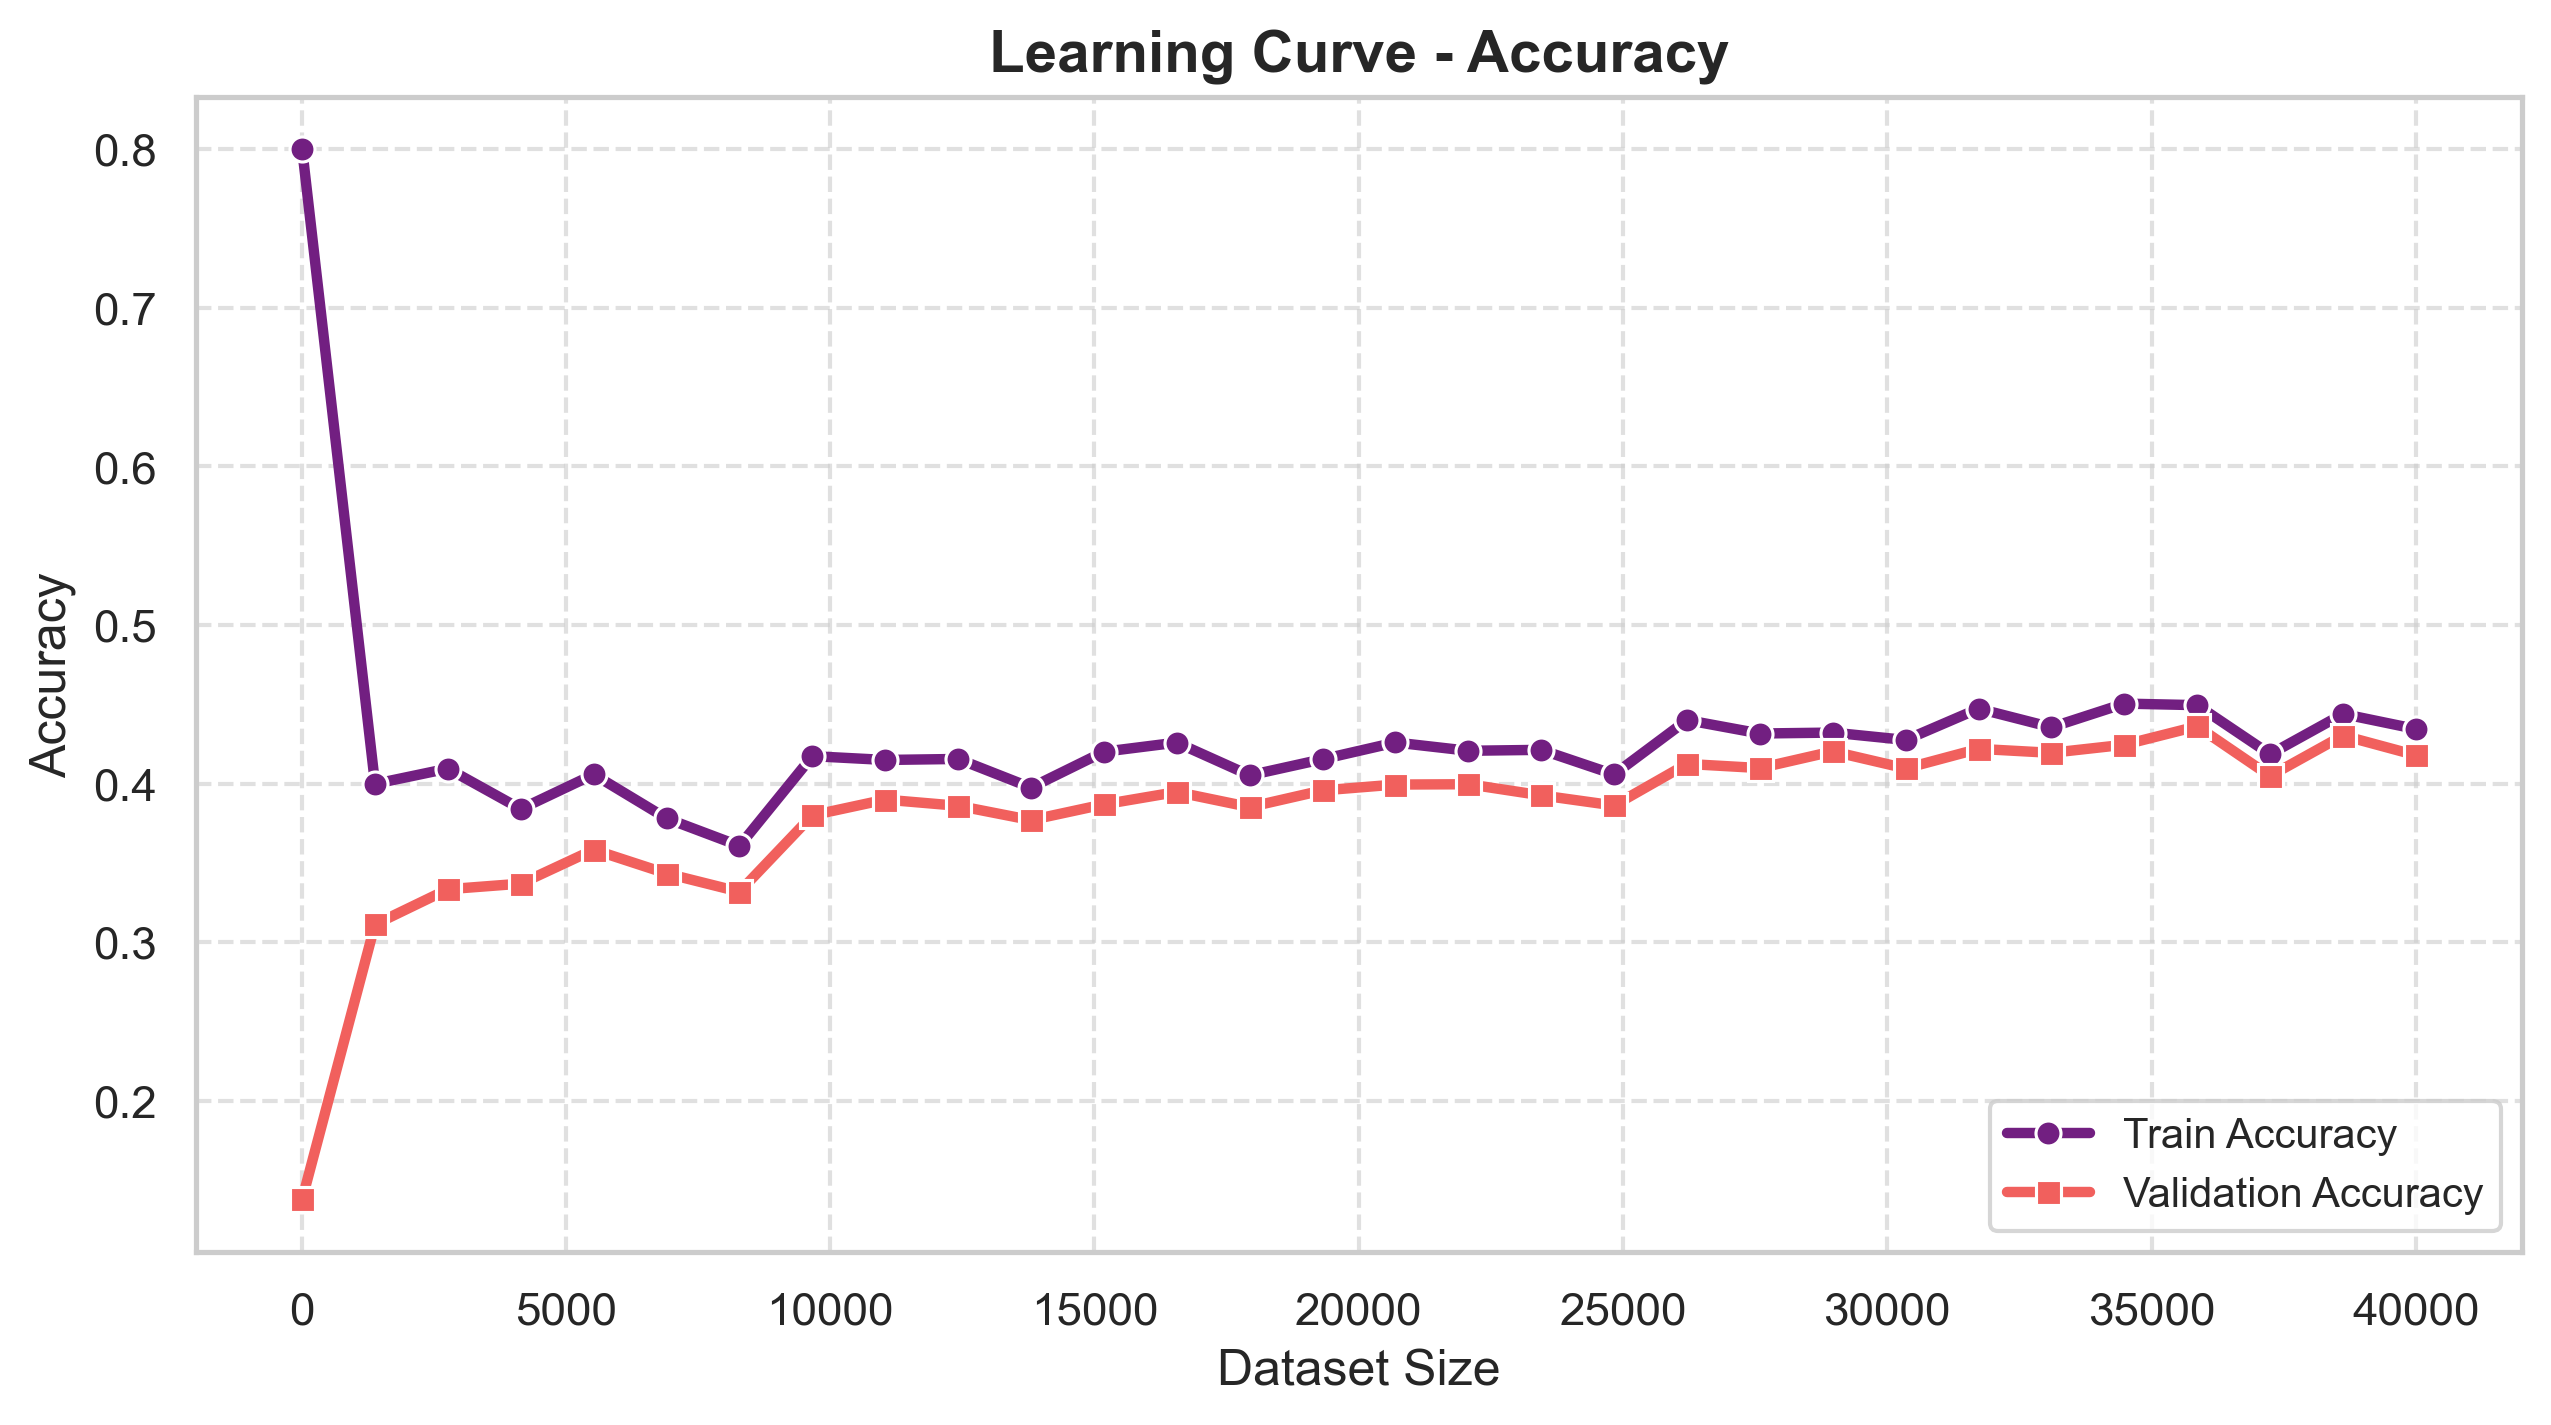

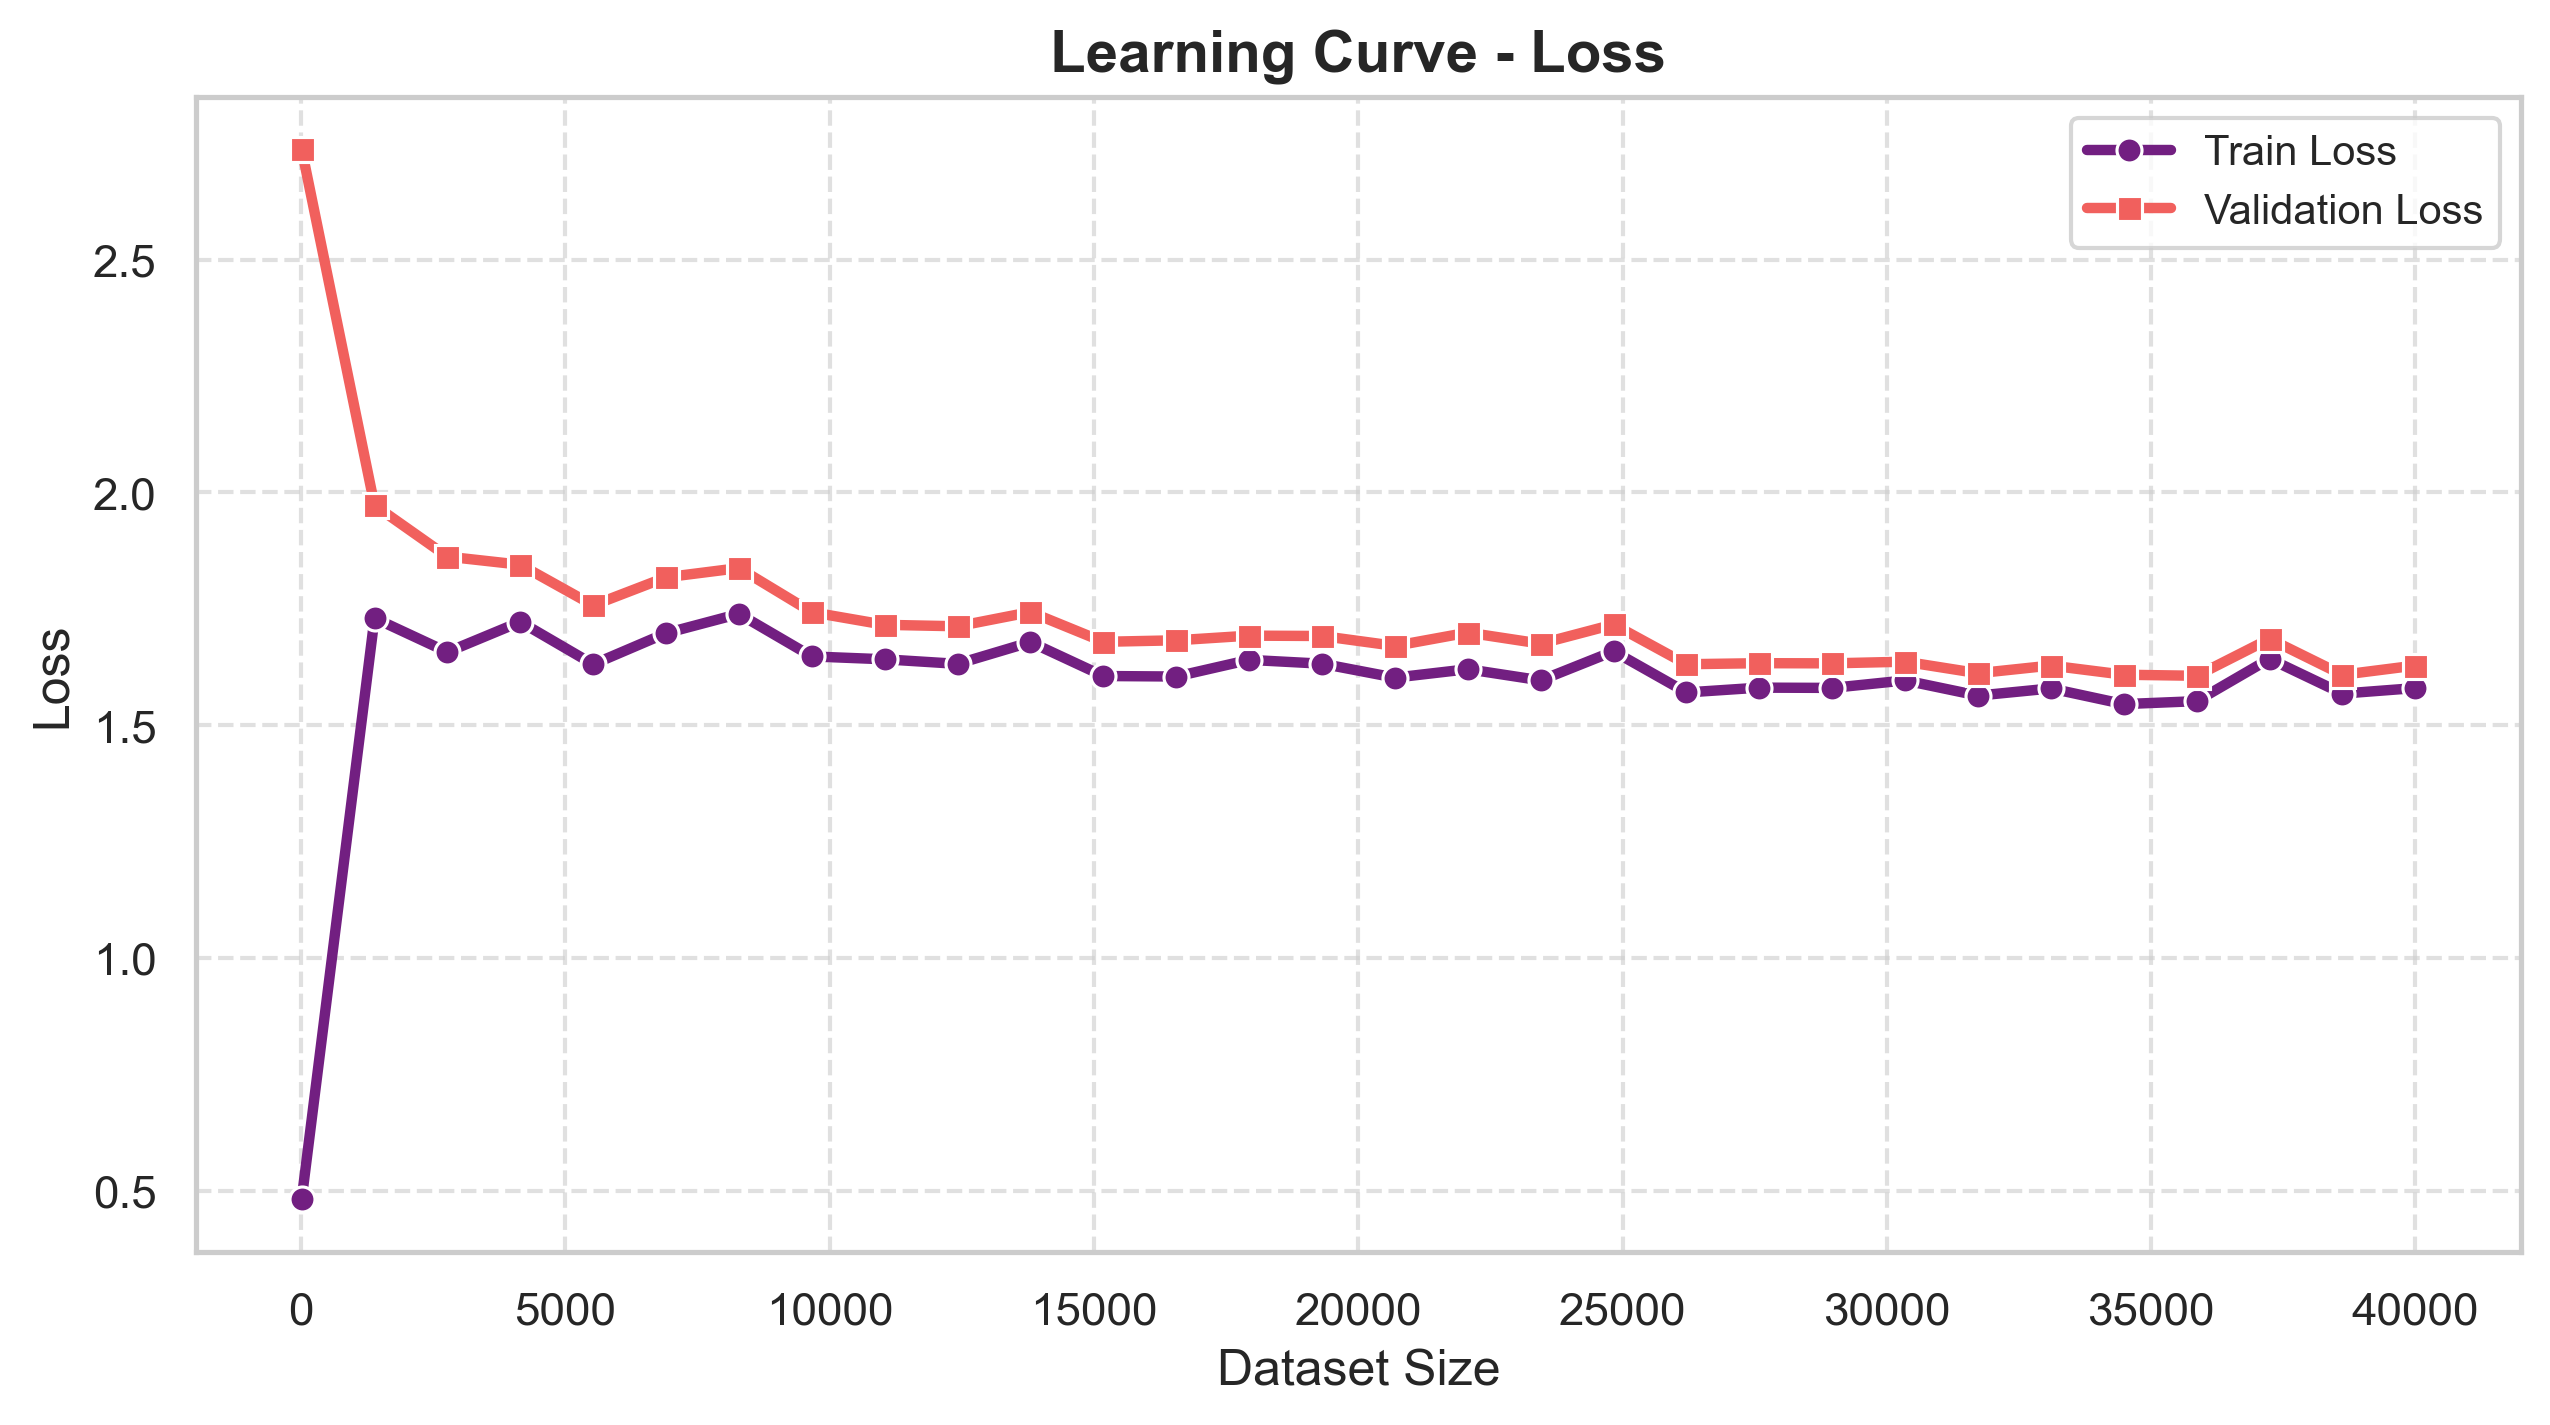

In [27]:
def plot_learning_curves(df):
    """Plots stylish accuracy and loss learning curves from a DataFrame."""
    
    # Set style
    sns.set_theme(style="whitegrid", palette="viridis")
    colors = sns.color_palette("magma", 2)

    # Plot Accuracy
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df["Dataset Size"], y=df["Train Accuracy"], label="Train Accuracy", color=colors[0], marker='o', linewidth=2.5)
    sns.lineplot(x=df["Dataset Size"], y=df["Val Accuracy"], label="Validation Accuracy", color=colors[1], marker='s', linewidth=2.5)
    plt.xlabel("Dataset Size", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("Learning Curve - Accuracy", fontsize=14, fontweight='bold')
    plt.legend(frameon=True, loc="lower right", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Plot Losses
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df["Dataset Size"], y=df["Train Losses"], label="Train Loss", color=colors[0], marker='o', linewidth=2.5)
    sns.lineplot(x=df["Dataset Size"], y=df["Val Losses"], label="Validation Loss", color=colors[1], marker='s', linewidth=2.5)
    plt.xlabel("Dataset Size", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.title("Learning Curve - Loss", fontsize=14, fontweight='bold')
    plt.legend(frameon=True, loc="upper right", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

plot_learning_curves(lc_df)

# Comments
It seems to work as intended.  
TODO:   
- Test for ES, because it won't work likely. 
- Test replicability because of the seeds. 
- Think about how to export and handle this pieces of art.